# Nepali News Recommendation

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv(r"C:\Users\neupa\Desktop\CodeHimalaya_Interview\nepali-news-dataset.csv", encoding='utf-8')

In [71]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [72]:
df

,content,heading,main_topic
0,कालीगण्डकी करिडोरमा पर्ने सेती भिरमा लरी प्लेट...,कालीगण्डकी करिडोरमा पर्ने सेती भिरबाट ट्रक खस्...,accidents
1,ट्याक्टर दुर्घटना हुँदा बैतडीमा दुई जनाको मृत्...,ट्याक्टर दुर्घटना हुँदा दुई जनाको घटनास्थलमै म...,accidents
2,भक्तपुरमा आज बिहान सवारी दुर्घटना हँदा एक जनाक...,"भक्तपुरमा भैंसी बोकेको ट्रक दुर्घटना, ढोकाले च...",accidents
3,बैतडी बिहीवार ट्याक्टर दुर्घटना हुँदा चालकको घ...,ट्याक्टर दुर्घटना हुुँदा चालकको मृत्यु,accidents
4,बैतडीको सुनर्या गाउँपालिका–७ आलुगैरामा जिप दुर...,बैतडीमा जिप दुर्घटना : चालकको घटनास्थलमै मृत्य...,accidents
...,...,...,...
61340,काठमाडौँ । मेगा बैंक नेपाल लिमिटेडले ‘मेगा रेम...,मेगा बैंकले ल्यायो हातैमा रेमिट्यान्स,wealth
61341,काठमाडौं । नेपालको विश्वसनीय इलेक्ट्रोनिक्स ब्...,सामसङ QLED टिभिको प्रि–बुकिङ्ग खुल्ला,wealth
61342,नेपाल राष्ट्र बैंकले २०७७ असोज मसान्तभित्रमा ए...,"बैंकहरूले सार्वजनिक गरे स्थिर ब्याजदर, कसको कति ?",wealth
61343,"काठमाडौं । साना–साना गल्ली, गल्लीभित्र सानो पस...","चम्किँदै सस्तो बजार, ब्रान्डेड सामान बेच्नेहरु...",wealth


<b> I initially tried using the entire data for calculating cosine similarities. But, due to the lack of enough memory, I decided to use 250 samples from each class and use this subset to perform recommendations.

In [73]:
df = df.groupby('main_topic').apply(lambda x: x.sample(n=250, random_state=42)).reset_index(drop=True)

In [74]:
df.groupby('main_topic')['content'].size()

main_topic
accidents             250
auto                  250
corporate             250
entertainment         250
film                  250
finance               250
health                250
interview             250
literature            250
migration             250
national              250
opinion               250
politics              250
science_technology    250
society               250
sports                250
tourism               250
wealth                250
Name: content, dtype: int64

In [75]:
df.to_csv("Sampled_Data.csv", index = True)

In [76]:
df.sample(1, random_state = 1).values

array([['अन्तर्राष्ट्रिय युवा दिवस १९९९ देखि विश्भरिका राष्ट्रहरूले उत्सवका रूपमा मनाउँदै आइरहेका छन् । संयुक्त राष्ट्र संघले युवाका मुद्धाहरूलाई स्थापित गर्न प्रत्येक १२ अगस्टलाई अन्तर्राष्ट्रिय युवा दिवसका रूपमा\xa0 घोषणा गरेको छ । युवाका सवालहरूमा विश्वका सरकार तथा सरोकारवालालाई सचेत तथा जगारूक गरान यो दिवसको घोषण गरिएको हो । \n \nविगतका वर्षहरूमा विभिन्न युवा सम्बन्धी नाराहरूतया गरी मनाइँदै आइरहेको यो दिवसको यस वर्ष अर्थात २०१५ को नाराका रूपमा युवा नागरिक सहभागिता रहेको छ । यस वर्षको अन्तर्राष्ट्रिय युवा दिवसको नारालाई नेपालीपनसँग जोड्नको युवा तथा खेलकुद मन्त्रालयले तय गरेको ‘पुननिर्माणमा युवाको सार्थक सहभागिताू विषयक नारा नेपालको सन्दर्भमा बढी सान्दर्भिक देखिन्छ । सामान्य अर्थमा व्यक्तिलाई उमेरका आधारमा गरिने पहिचानअनुरुप वाल्यावस्था पार गरिसकेका र प्रौढावस्थामा पुगिनसकेका समूहका व्यक्तिलाई युवा भनिन्छ । युवा त्यो उमेर समूह हो जसमा राष्ट्रको भविष्यका कर्णाधार वर्तमानका साझेदार तथा विकास र परिवर्तनका संवाहकको सामथ्र्य रहेको हुन्छ । राष्ट्र निर्माणमा सबै उमेर र अवस्थाका व्यक्तिहरुको

In [77]:
df.shape, df.drop_duplicates().shape

((4500, 3), (4500, 3))

Good to know that there are no duplicates in the dataset.

In [78]:
number_of_articles_per_class = df.main_topic.value_counts().reset_index()
number_of_articles_per_class.sort_values("main_topic", ascending = False, inplace = True)
number_of_articles_per_class

,main_topic,count
17,wealth,250
2,tourism,250
3,sports,250
4,society,250
5,science_technology,250
6,politics,250
7,opinion,250
8,national,250
9,migration,250
10,literature,250


Text(0, 0.5, 'News category')

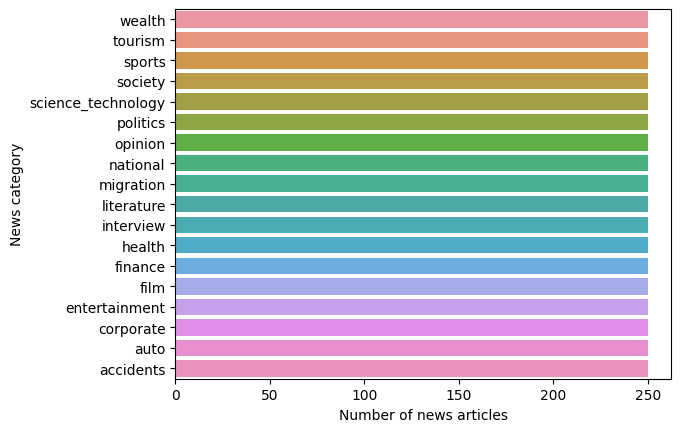

In [79]:
ax = plt.subplot()

sns.barplot(y = 'main_topic', x = 'count', data = number_of_articles_per_class)
plt.xlabel("Number of news articles")
plt.ylabel("News category")

In [80]:
df

,content,heading,main_topic
0,सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार रा...,"सिरहाको बेल्हामा आगलागी, २३ लाख रुपैयाँ बराबरक...",accidents
1,मङ्गलबार बर्दियाको ठाकुरबाबा नगरपालिका–३ मानपु...,नहरमा डुबेर बर्दियामा एक बालिकाको मृत्यु,accidents
2,चितवनको भरतपुरमा तीन दिनदेखि बेपत्ता भएका एक व...,हराएका वृद्ध तीन दिनपछि जङ्गलमा मृत भेटिए,accidents
3,नवलपरासी पूर्व नवलपुरमा सर्पले टोकेर एक जना वृ...,सर्पले टोकेर ६८ बर्से वृद्धको मृत्यु,accidents
4,एनेकपा माओवादीकी पूर्वसभासद् बुधनीदेवी महतोलाई...,एमाओवादीका पूर्व सभासद्‍लाई अज्ञात समूहले मरणा...,accidents
...,...,...,...
4495,काठमाडौं । नबिल इन्भेष्टमेन्ट बैंङ्किङको ऋणपत्...,प्रभु बैंकको ऋणपत्र निष्काशन तथा बिक्री प्रबन्...,wealth
4496,काठमाडौं । इजि एस्योरेन्सअन्र्तगतको इजि ट्याक्...,इजि ट्याक्सी प्रयोगकर्ताले माछापुच्छ्रे बैंकको...,wealth
4497,काठमाडौं । लामो रस्साकस्सीपछि अन्ततः सरकार एउट...,असोज १ देखि लामो रुटका सवारीसाधन सञ्चालन होला ?,wealth
4498,ललितपुर– विश्वप्रख्यात कोरियन गाडी उत्पादक कम्...,जाउलाखेलमा किया मोटर्सको अत्याधुनिक शोरुम संचा...,wealth


# Data Cleaning

In [81]:
nepali_sentence = df.content.iloc[0];nepali_sentence

'सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार राति खाना पकाउने ग्याँस चुहिएर आगलागी हुँदा करिब २३ लाख रुपैयाँ बराबरको धनमाल क्षति भएको छ ।\xa0 \n \nबेल्हास्थित कमला खोलाको बाँध निर्माण गर्ने मजदुरले खाना पकाउने क्रममा अचानक ग्याँस लिक भएर आगलागी हुँदा बाँध निर्माणमा प्रयोग हुने एक थान जेनेटरलगायतका सामान जलेर नष्ट भएका छन्। \n \nप्रहरी चौकी बेल्हाबाट खटिएको प्रहरी टोली र स्थानीयवासीको सहयोगमा आगो नियन्त्रणमा आएको प्रहरीले बताएको छ ।रासस'

## Converting to lowercase

In this case, since Nepali characters do not have well-defined uppercase or lowercase forms, the word remains the same in both uppercase and lowercase representations. Unlike in english language where ENGLISH would be uppercase and english would be lowercase, this distictions does not generally apply in nepali words. Therefore this sections will be passed.

In [82]:
def lower_order(text):
    return text

## Removing URLs from the text

In [83]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [84]:
remove_urls(nepali_sentence+" https://sujanneupane.com")

'सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार राति खाना पकाउने ग्याँस चुहिएर आगलागी हुँदा करिब २३ लाख रुपैयाँ बराबरको धनमाल क्षति भएको छ ।\xa0 \n \nबेल्हास्थित कमला खोलाको बाँध निर्माण गर्ने मजदुरले खाना पकाउने क्रममा अचानक ग्याँस लिक भएर आगलागी हुँदा बाँध निर्माणमा प्रयोग हुने एक थान जेनेटरलगायतका सामान जलेर नष्ट भएका छन्। \n \nप्रहरी चौकी बेल्हाबाट खटिएको प्रहरी टोली र स्थानीयवासीको सहयोगमा आगो नियन्त्रणमा आएको प्रहरीले बताएको छ ।रासस '

This custom function to remove URLs does work.

## Remove HTML tags

In [85]:
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)

In [86]:
rm_html(nepali_sentence+" <html><br>")

'सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार राति खाना पकाउने ग्याँस चुहिएर आगलागी हुँदा करिब २३ लाख रुपैयाँ बराबरको धनमाल क्षति भएको छ ।\xa0 \n \nबेल्हास्थित कमला खोलाको बाँध निर्माण गर्ने मजदुरले खाना पकाउने क्रममा अचानक ग्याँस लिक भएर आगलागी हुँदा बाँध निर्माणमा प्रयोग हुने एक थान जेनेटरलगायतका सामान जलेर नष्ट भएका छन्। \n \nप्रहरी चौकी बेल्हाबाट खटिएको प्रहरी टोली र स्थानीयवासीको सहयोगमा आगो नियन्त्रणमा आएको प्रहरीले बताएको छ ।रासस '

## Remove Emojis



In [87]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

In [88]:
text_with_emoji =  nepali_sentence+ " 😊 🍕🍕"
text_with_emoji

'सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार राति खाना पकाउने ग्याँस चुहिएर आगलागी हुँदा करिब २३ लाख रुपैयाँ बराबरको धनमाल क्षति भएको छ ।\xa0 \n \nबेल्हास्थित कमला खोलाको बाँध निर्माण गर्ने मजदुरले खाना पकाउने क्रममा अचानक ग्याँस लिक भएर आगलागी हुँदा बाँध निर्माणमा प्रयोग हुने एक थान जेनेटरलगायतका सामान जलेर नष्ट भएका छन्। \n \nप्रहरी चौकी बेल्हाबाट खटिएको प्रहरी टोली र स्थानीयवासीको सहयोगमा आगो नियन्त्रणमा आएको प्रहरीले बताएको छ ।रासस 😊 🍕🍕'

In [89]:
emoji_removed = remove_emoji(text_with_emoji)
print(emoji_removed)

सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार राति खाना पकाउने ग्याँस चुहिएर आगलागी हुँदा करिब २३ लाख रुपैयाँ बराबरको धनमाल क्षति भएको छ ।  
 
बेल्हास्थित कमला खोलाको बाँध निर्माण गर्ने मजदुरले खाना पकाउने क्रममा अचानक ग्याँस लिक भएर आगलागी हुँदा बाँध निर्माणमा प्रयोग हुने एक थान जेनेटरलगायतका सामान जलेर नष्ट भएका छन्। 
 
प्रहरी चौकी बेल्हाबाट खटिएको प्रहरी टोली र स्थानीयवासीको सहयोगमा आगो नियन्त्रणमा आएको प्रहरीले बताएको छ ।रासस    


## Remove Unwanted Characters



In [90]:
def remove_unwanted_characters_nepali(document):
    # remove user mentions
    document = re.sub("@[^\s]+", " ", document)
    # remove hashtags
    document = re.sub("#[^\s]+", "", document)
    # remove punctuation (except for Nepali Unicode characters)
    document = re.sub("[^\u0900-\u097F0-9A-Za-z\s]", "", document)
    # remove emojis
    document = remove_emoji(document)
    
    # remove double spaces
    document = document.replace('  ', "")
    document = re.sub(r"[^\w\s]", "", document)
    return document.strip()

In [91]:
text = nepali_sentence +" @! #";text

'सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार राति खाना पकाउने ग्याँस चुहिएर आगलागी हुँदा करिब २३ लाख रुपैयाँ बराबरको धनमाल क्षति भएको छ ।\xa0 \n \nबेल्हास्थित कमला खोलाको बाँध निर्माण गर्ने मजदुरले खाना पकाउने क्रममा अचानक ग्याँस लिक भएर आगलागी हुँदा बाँध निर्माणमा प्रयोग हुने एक थान जेनेटरलगायतका सामान जलेर नष्ट भएका छन्। \n \nप्रहरी चौकी बेल्हाबाट खटिएको प्रहरी टोली र स्थानीयवासीको सहयोगमा आगो नियन्त्रणमा आएको प्रहरीले बताएको छ ।रासस @! #'

In [92]:
remove_unwanted_characters_nepali(text)

'सरहक कलयणपर नगरपलक बलहम समबर रत खन पकउन गयस चहएर आगलग हद करब २३ लख रपय बरबरक धनमल कषत भएक छ \xa0 \n \nबलहसथत कमल खलक बध नरमण गरन मजदरल खन पकउन करमम अचनक गयस लक भएर आगलग हद बध नरमणम परयग हन एक थन जनटरलगयतक समन जलर नषट भएक छन \n \nपरहर चक बलहबट खटएक परहर टल र सथनयवसक सहयगम आग नयनतरणम आएक परहरल बतएक छ रसस'

## Remove unnecessary whitespaces

In [93]:
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)

In [94]:
rm_whitespaces(nepali_sentence+"           "+"New whitespaces were added before this english sentence")

'सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार राति खाना पकाउने ग्याँस चुहिएर आगलागी हुँदा करिब २३ लाख रुपैयाँ बराबरको धनमाल क्षति भएको छ ।\xa0 \n \nबेल्हास्थित कमला खोलाको बाँध निर्माण गर्ने मजदुरले खाना पकाउने क्रममा अचानक ग्याँस लिक भएर आगलागी हुँदा बाँध निर्माणमा प्रयोग हुने एक थान जेनेटरलगायतका सामान जलेर नष्ट भएका छन्। \n \nप्रहरी चौकी बेल्हाबाट खटिएको प्रहरी टोली र स्थानीयवासीको सहयोगमा आगो नियन्त्रणमा आएको प्रहरीले बताएको छ ।रासस New whitespaces were added before this english sentence'

## Remove Punctutations



In [95]:
def remove_punctuations_nepali(sentence):
    punctuations = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।॥"""
    return re.sub('[' + re.escape(punctuations) + ']', '', sentence)

In [96]:
text = "नमस्ते! के छ तपाईंको नाम? म सन्चै खुशी छु।"
cleaned_text = remove_punctuations_nepali(text)
print(cleaned_text)

नमस्ते के छ तपाईंको नाम म सन्चै खुशी छु


## Remove Stopwords



In [97]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
stop_words = set(stopwords.words('nepali'));list(stop_words)[:10]

['र', 'थिएन', 'रूप', 'यद्यपि', 'औं', 'क्रमशः', 'जो', 'भित्र', 'सम्भव', 'को']

In [99]:
custom_stopwords = ['छ', 'हो', 'ले', 'को']
stop_words.update(custom_stopwords)

In [100]:
def remove_stopwords_nepali(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# def remove_stopwords_nepali(text_tokens):
#     result_tokens = []
#     for token in text_tokens:
#         if token not in stop_words:
#             result_tokens.append(token)
#     return result_tokens

In [101]:
text = "हामीले त्यो काम गर्ने थियौं की नि?"
cleaned_text = remove_stopwords_nepali(text)
print(cleaned_text)

हामीले काम थियौं की ?


## Stemming vs Lemmatization

In stemming, we simply slice a particular word to reduce the number of duplicates; The word playing could be stemmed to play which will reduce the number of words in our vocabulary. Stemming is much faster than lammatization whereas it is not that accurate.

In Lemmatization, we have to convert each word to its root form; playing could me lemattized to play or plays to play. However, it is slower than stemming as we have to find the root word. But, this also makes it more accurate.

Unlike english langauge which could be easily lemmatized or stemmed, this feature is not available in nltk.
<b> After doing a through reseach, I found a python package called nepali-stemmer

In [102]:
from nepali_stemmer.stemmer import NepStemmer
nepstem = NepStemmer()

In [103]:
nepstem.stem("नेपालको एमाले पार्टीका झोले, मण्डलेहरु अमेरिका आउने रे !")

'नेपाल को एमाले पार्टी का झोले, मण्डले हरु अमेरिका आउने रे !'

<b> The dataset that I have is not very big, which is why I wanted to use Lemmatization. But, I couldn't find the appropriate package offering such faeture for a nepali dataset. After a through reading of multiple research articles, I came accross a python package offered in this github repositiory that provided stemming in Nepali.
    
    Link to GitHub: https://github.com/oya163/nepali-stemmer

Therefore, I decided to use Stemming as I couldn't get appropriate method for performing lemmatization on nepali sequences.

In [104]:
def nepali_stemming(text):
  return nepstem.stem(text)

## Removing Nepali Numbers

Since I am doing nepali news classifcation, there may not be a necessecity to include raw nepali numbers.

In [105]:
import re

def remove_nepali_numbers(text):
    # Regular expression pattern to match numeric characters in Nepali script
    pattern = r'[०-९]'

    # Remove numeric characters using regex substitution
    text_without_numbers = re.sub(pattern, '', text)
    
    return text_without_numbers

# Example usage
nepali_text = "नेपाली न्यूज़ २०२३"
text_without_numbers = remove_nepali_numbers(nepali_text)
print(text_without_numbers)

नेपाली न्यूज़ 


## Tokenization

In [106]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

# preprocessing
def tokenize(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Custom Pipeline to clean text



lower_order, remove_urls, rm_html, remove_emoji, remove_unwanted_characters_nepali, rm_whitespaces, remove_punctuations_nepali, remove_stopwords_nepali, stemming, tokenize

In [107]:
def custom_cleaning_pipeline(string):   
    string = lower_order(string)
    string = remove_urls(string)
    string = rm_html(string)
    string = remove_emoji(string)
    string = remove_unwanted_characters_nepali(string)
    string = remove_punctuations_nepali(string)
    string = remove_nepali_numbers(string)
    string = rm_whitespaces(string)
    
    string = remove_stopwords_nepali(string)
    string = tokenize(string)
    string = nepali_stemming(" ".join(string))

    return string

In [108]:
text = df.content.sample(1).values[0];text

'युवा वकिलले मेरो नाम, थर र वतन लेखे । अनि हातमा कलम लिएर ठट्टाको भाकामा मलाई सोधे, “सर हुन त माओवादी नै हुनुहुन्छ, हकि ? “ठिक छ, त्यै लेख्नोस् ।” मैले मुस्कानमय मुद्रामा चुरोटको धुवाँ वकिलको अनुहारतिर हुर्\u200dर्याएँ । नेपाली कागजमा लम्बेतान ब्यहोरा लेखिसकेपछि उनले भने, “सर, यो पढुँ र यसमा सहीछाप गरिदिऊँ ।” “तपाई पनि पेशागत धर्मले त सरकारी वकिल नै हुनुहन्छ । वयानमा सरकारी वकिलको पेसागत चरित्र झल्किने कुरा त पार्नुभएकै होला, कि कसो ?” “पहिले पढी त हेर्नोस् ।” मैले पढ्दै नपढी सही धस्काइदिएँ । साढे तीन बजिसकेको थियो । प्रहरी भ्यान प्रजिअ कार्यालय विजुलीबजारतिर हुइँकियो । प्रजिअको आदेशको प्रतिक्षामा कार्यालय बाहिर केहीवेर कुरेपछि भित्रबाट बोलाहट भयो । प्रजिअ विजयराज भट्टराई रहेछन्, तनहुँमा मास्टरी गर्दा मसँग परिचय भएका छुपे रुस्तम मार्कामा पुराना काङ्ग्रेस । नाटकीय सद्भाव र खातिरदारी प्रदर्शन गर्दै मेरो नमस्कारको प्रत्युत्तरमा उनले हाकिमी आसनबाट बाहिर निस्केर मसँग हात मिलाए । प्रजिअको आदेशको प्रतिक्षामा कार्यालय बाहिर केहीवेर कुरेपछि भित्रबाट बोलाहट भयो । प्रजिअ विजयराज भट्टराई रहेछन्, त

In [109]:
text1 = custom_cleaning_pipeline(text)
text1
# text1 = custom_preprocessing_pipeline(text1);text1

'यव वकलल मर नम थर वतन लख अन हतम कलम लएर ठटटक भकम मलई सध सर हन मओवद हनहनछ हकठक तय लखनस मल मसकनमय मदरम चरटक धव वकलक अनहरतर हररयए नपल कगजम लमबतन बयहर लखसकपछ उनल सर य पढ यसम सहछप गरदऊ तपई पन पशगत धरमल सरकर वकल हनहनछ वयनम सरकर वकलक पसगत चरतर झलकन कर परनभएक हल क कसपहल पढ हरनस मल पढद नपढ सह धसकइदए सढ तन बजसकक थय परहर भयन परजअ करयलय वजलबजरतर हइकय परजअक आदशक परतकषम करयलय बहर कहवर करपछ भतरबट बलहट भय परजअ वजयरज भटटरई रहछन तनहम मसटर गरद मसग परचय भएक छप रसतम मरकम परन कङगरस नटकय सदभव खतरदर परदरशन गरद मर नमसकरक परतयततरम उनल हकम आसनबट बहर नसकर मसग हत मलए परजअक आदशक परतकषम करयलय बहर कहवर करपछ भतरबट बलहट भय परजअ वजयरज भटटरई रहछन तनहम मसटर गरद मसग परचय भएक छप रसतम मरकम परन कङगरस नटकय सदभव खतरदर परदरशन गरद मर नमसकरक परतयततरम उनल हकम आसनबट बहर नसकर मसग हत मलए ल मर अगड सरक बयन लन यव वकललई उनल अहरए बकलल फटवल बयनकरमलई ततकल डकर लयए उत जऊ सर उनल मलई आफन फटतर डरयए पठकक हसयतल उन जनयर भनभकतलई चनद रहछन उनल मसग अनतरङग वयवहर गर हन लखन मनछलई य क गरय हसरल कत भषणससण गरन भ थन थय रसवधनल लखकलई भषण गरन हदन भनय रबयन लन कह थए

In [110]:
from tqdm import tqdm

<b><font color='red'>I tried using the entire content column to compute cosine similarity but due to the large size of td-idf vectorized matrix, I got memory error. Therefore, I will only make use of the subset of entire data to compute cosine simiarities. But, I do acknowledge that using only a subset might not result in precise recommendations. I had to make a choice between performance and accuracy, and I chose performance.|</font>

In [111]:
df['complete_text'] = df.content + " " + df.heading#df.heading.copy()

In [112]:
df

,content,heading,main_topic,complete_text
0,सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार रा...,"सिरहाको बेल्हामा आगलागी, २३ लाख रुपैयाँ बराबरक...",accidents,सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार रा...
1,मङ्गलबार बर्दियाको ठाकुरबाबा नगरपालिका–३ मानपु...,नहरमा डुबेर बर्दियामा एक बालिकाको मृत्यु,accidents,मङ्गलबार बर्दियाको ठाकुरबाबा नगरपालिका–३ मानपु...
2,चितवनको भरतपुरमा तीन दिनदेखि बेपत्ता भएका एक व...,हराएका वृद्ध तीन दिनपछि जङ्गलमा मृत भेटिए,accidents,चितवनको भरतपुरमा तीन दिनदेखि बेपत्ता भएका एक व...
3,नवलपरासी पूर्व नवलपुरमा सर्पले टोकेर एक जना वृ...,सर्पले टोकेर ६८ बर्से वृद्धको मृत्यु,accidents,नवलपरासी पूर्व नवलपुरमा सर्पले टोकेर एक जना वृ...
4,एनेकपा माओवादीकी पूर्वसभासद् बुधनीदेवी महतोलाई...,एमाओवादीका पूर्व सभासद्‍लाई अज्ञात समूहले मरणा...,accidents,एनेकपा माओवादीकी पूर्वसभासद् बुधनीदेवी महतोलाई...
...,...,...,...,...
4495,काठमाडौं । नबिल इन्भेष्टमेन्ट बैंङ्किङको ऋणपत्...,प्रभु बैंकको ऋणपत्र निष्काशन तथा बिक्री प्रबन्...,wealth,काठमाडौं । नबिल इन्भेष्टमेन्ट बैंङ्किङको ऋणपत्...
4496,काठमाडौं । इजि एस्योरेन्सअन्र्तगतको इजि ट्याक्...,इजि ट्याक्सी प्रयोगकर्ताले माछापुच्छ्रे बैंकको...,wealth,काठमाडौं । इजि एस्योरेन्सअन्र्तगतको इजि ट्याक्...
4497,काठमाडौं । लामो रस्साकस्सीपछि अन्ततः सरकार एउट...,असोज १ देखि लामो रुटका सवारीसाधन सञ्चालन होला ?,wealth,काठमाडौं । लामो रस्साकस्सीपछि अन्ततः सरकार एउट...
4498,ललितपुर– विश्वप्रख्यात कोरियन गाडी उत्पादक कम्...,जाउलाखेलमा किया मोटर्सको अत्याधुनिक शोरुम संचा...,wealth,ललितपुर– विश्वप्रख्यात कोरियन गाडी उत्पादक कम्...


In [113]:
%%time

df['complete_text'] = df.complete_text.apply(lambda y : custom_cleaning_pipeline(y))

CPU times: total: 16.3 s
Wall time: 19.7 s


In [114]:
df_original = df.copy()

In [115]:
df

,content,heading,main_topic,complete_text
0,सिरहाको कल्याणपुर नगरपालिका बेल्हामा सोमबार रा...,"सिरहाको बेल्हामा आगलागी, २३ लाख रुपैयाँ बराबरक...",accidents,सरहक कलयणपर नगरपलक बलहम समबर रत खन पकउन गयस चह...
1,मङ्गलबार बर्दियाको ठाकुरबाबा नगरपालिका–३ मानपु...,नहरमा डुबेर बर्दियामा एक बालिकाको मृत्यु,accidents,मङगलबर बरदयक ठकरबब नगरपलक मनपर बसन पण ऐरक छर व...
2,चितवनको भरतपुरमा तीन दिनदेखि बेपत्ता भएका एक व...,हराएका वृद्ध तीन दिनपछि जङ्गलमा मृत भेटिए,accidents,चतवनक भरतपरम तन दनदख बपतत भएक वदध बधबर जङगलम म...
3,नवलपरासी पूर्व नवलपुरमा सर्पले टोकेर एक जना वृ...,सर्पले टोकेर ६८ बर्से वृद्धको मृत्यु,accidents,नवलपरस परव नवलपरम सरपल टकर जन वदधक मतय भएक कवस...
4,एनेकपा माओवादीकी पूर्वसभासद् बुधनीदेवी महतोलाई...,एमाओवादीका पूर्व सभासद्‍लाई अज्ञात समूहले मरणा...,accidents,एनकप मओवदक परवसभसद बधनदव महतलई गएरत अजञत समहल ...
...,...,...,...,...
4495,काठमाडौं । नबिल इन्भेष्टमेन्ट बैंङ्किङको ऋणपत्...,प्रभु बैंकको ऋणपत्र निष्काशन तथा बिक्री प्रबन्...,wealth,कठमड नबल इनभषटमनट बङकङक ऋणपतर नषकशन तथ बकर परब...
4496,काठमाडौं । इजि एस्योरेन्सअन्र्तगतको इजि ट्याक्...,इजि ट्याक्सी प्रयोगकर्ताले माछापुच्छ्रे बैंकको...,wealth,कठमड इज एसयरनसअनरतगतक इज टयकसल मछपचछर बकसग वयव...
4497,काठमाडौं । लामो रस्साकस्सीपछि अन्ततः सरकार एउट...,असोज १ देखि लामो रुटका सवारीसाधन सञ्चालन होला ?,wealth,कठमड लम रससकससपछ अनतत सरकर एउट नरणयम पगक उपतयक...
4498,ललितपुर– विश्वप्रख्यात कोरियन गाडी उत्पादक कम्...,जाउलाखेलमा किया मोटर्सको अत्याधुनिक शोरुम संचा...,wealth,ललतपर वशवपरखयत करयन गड उतपदक कमपन कय मटरसल ललत...


In [116]:
# Saving the array
np.save('SampleData.npy', df.values)

# loaded_array = np.load('SampleData.npy', allow_pickle = True)

In [119]:
# import pickle
# pickle.dump(df.values, open('SampleData.pkl', 'wb'))

In [120]:
df['complete_text']

0       सरहक कलयणपर नगरपलक बलहम समबर रत खन पकउन गयस चह...
1       मङगलबर बरदयक ठकरबब नगरपलक मनपर बसन पण ऐरक छर व...
2       चतवनक भरतपरम तन दनदख बपतत भएक वदध बधबर जङगलम म...
3       नवलपरस परव नवलपरम सरपल टकर जन वदधक मतय भएक कवस...
4       एनकप मओवदक परवसभसद बधनदव महतलई गएरत अजञत समहल ...
                              ...                        
4495    कठमड नबल इनभषटमनट बङकङक ऋणपतर नषकशन तथ बकर परब...
4496    कठमड इज एसयरनसअनरतगतक इज टयकसल मछपचछर बकसग वयव...
4497    कठमड लम रससकससपछ अनतत सरकर एउट नरणयम पगक उपतयक...
4498    ललतपर वशवपरखयत करयन गड उतपदक कमपन कय मटरसल ललत...
4499    कठमड तपई मबइल नटवरक नभएक सथनम जद हनहनछबयटर सकए...
Name: complete_text, Length: 4500, dtype: object

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

Computers don't understand text. We need to convert them into numerical form before feeding the texutal data into our model. There are several ways we can perform encoding with each method having its own advantages and disadvantages.

I will make use of TF-IDF Vectorizer, also known as Term Frequency - Inverse Document Frequency Vectorizer, to convert text data into numeric form.

The TF-IDF vectorizer computes the TF-IDF scores for each term (word) in a given corpus of documents. It represents each document as a vector, where each element corresponds to the TF-IDF score of a term in that document. The TF-IDF score reflects the importance of a term in a document relative to the entire corpus.



In [122]:
%%time

# Compute TF-IDF vectors for the entire dataset
'''
By setting max_features to a specific value, we can ensure that only the most important words, up to the specified 
limit, are considered for the TF-IDF vectorization process. 
This helps in reducing the dimensionality of the data and focusing on the most informative terms.

Remember that choosing an appropriate value for max_features is crucial, as it impacts the balance between 
information retention and dimensionality reduction. we may need to experiment with different values to find 
the optimal balance for your dataset and recommendation system.
'''
vectorizer = TfidfVectorizer(max_features = 250)
tfidf_matrix = vectorizer.fit_transform(df['complete_text'])

CPU times: total: 1.41 s
Wall time: 1.47 s


In [123]:
tfidf_matrix

<4500x250 sparse matrix of type '<class 'numpy.float64'>'
	with 218630 stored elements in Compressed Sparse Row format>

In [124]:
from sklearn.metrics.pairwise import cosine_similarity

In [125]:
%%time

# Calculate cosine similarities between the user input vector and the TF-IDF matrix
cosine_similarities = cosine_similarity(tfidf_matrix)

CPU times: total: 984 ms
Wall time: 1.08 s


In [126]:
cosine_similarities.shape

(4500, 4500)

In [127]:
np.save('cosine_similarities.npy', cosine_similarities)

In [129]:
random_heading = df_original.content.sample(1, random_state = 2).values[0];random_heading

'आफूले चलाएको कार दुर्घटना हुँदा भक्तपुरमा गएराति एक जनाको मृत्यु भएको छ। सूर्यविनायक नगरपालिका–८ नैचालबाट आशापुरी हुँदै डोलेश्वरतर्फ जाँदै गरेको बा ८ च २४३१ नम्बरको मारुती कार सडकबाट करिब ५०० मिटर तल खोल्छामा खसेर दुर्घटना भएको हो। दुर्घटनामा कारका चालक सूर्यविनायक–९ नलिन्चोक घर भई हाल काभ्रे जनगाल बस्ने ४० वर्षीय जीतेन्द्र खत्रीको घटनास्थलमै मृत्यु भएको प्रहरी वृत्त जगातीले जानकारी दिएको छ। शव परीक्षणका लागि भक्तपुर अस्पताल पठाइएको प्रहरी वृत्त जगातीका प्रहरी नायब उपरीक्षक दीपक श्रेष्ठले जानकारी दिए। रासस'

In [130]:
news = input("Enter the News:: ")

Enter the News::  'आफूले चलाएको कार दुर्घटना हुँदा भक्तपुरमा गएराति एक जनाको मृत्यु भएको छ। सूर्यविनायक नगरपालिका–८ नैचालबाट आशापुरी हुँदै डोलेश्वरतर्फ जाँदै गरेको बा ८ च २४३१ नम्बरको मारुती कार सडकबाट करिब ५०० मिटर तल खोल्छामा खसेर दुर्घटना भएको हो। दुर्घटनामा कारका चालक सूर्यविनायक–९ नलिन्चोक घर भई हाल काभ्रे जनगाल बस्ने ४० वर्षीय जीतेन्द्र खत्रीको घटनास्थलमै मृत्यु भएको प्रहरी वृत्त जगातीले जानकारी दिएको छ। शव परीक्षणका लागि भक्तपुर अस्पताल पठाइएको प्रहरी वृत्त जगातीका प्रहरी नायब उपरीक्षक दीपक श्रेष्ठले जानकारी दिए। रासस'


In [131]:
news = custom_cleaning_pipeline(news)

<B> I will make use of difflib module to get the most similar text in the dataset for the inputted text. After getting the most similar text in the dataset, I will use its index position to get the top k other data that are most similar to the inputted text.

In [133]:
import difflib

In [136]:
all_news = df.complete_text.values

In [137]:
%%time

detecting_similar_news = difflib.get_close_matches(news, all_news)[0]
detecting_similar_news

CPU times: total: 1.27 s
Wall time: 1.55 s


'आफल चलएक कर दरघटन हद भकतपरम गएरत जनक मतय भएक सरयवनयक नगरपलक नचलबट आशपर हद डलशवरतरफ जद गरक ब च नमबरक मरत कर सडकबट करब मटर खलछम खसर दरघटन भएक ह दरघटनम करक चलक सरयवनयक नलनचक घर भई हल कभर जनगल बसन वरषय जतनदर खतरक घटनसथलम मतय भएक परहर वतत जगतल जनकर दएक शव परकषणक लग भकतपर असपतल पठइएक परहर वतत जगतक परहर नयब उपरकषक दपक शरषठल जनकर दए रसस सरयवनयकम कर दरघटन चलकक मतय'

In [138]:
detecting_similar_news

'आफल चलएक कर दरघटन हद भकतपरम गएरत जनक मतय भएक सरयवनयक नगरपलक नचलबट आशपर हद डलशवरतरफ जद गरक ब च नमबरक मरत कर सडकबट करब मटर खलछम खसर दरघटन भएक ह दरघटनम करक चलक सरयवनयक नलनचक घर भई हल कभर जनगल बसन वरषय जतनदर खतरक घटनसथलम मतय भएक परहर वतत जगतल जनकर दएक शव परकषणक लग भकतपर असपतल पठइएक परहर वतत जगतक परहर नयब उपरकषक दपक शरषठल जनकर दए रसस सरयवनयकम कर दरघटन चलकक मतय'

In [140]:
# finding the index of the news
index_of_the_news = df[df.complete_text == detecting_similar_news].index.values[0]
index_of_the_news

35

In [141]:
# Calculating the similar news' indexes and their similarity values in a tuple inside another list
similarity_score = list(enumerate(cosine_similarities[index_of_the_news]))

In [150]:
# Sorting the previous List in accordance to their similarity score using Scored Function
sorted_similar_news = sorted(similarity_score, key = lambda x : x[1], reverse = True) 
sorted_similar_news.remove(sorted_similar_news[0]) # the first element is the same as the input text

In [151]:
while True:
    try:
        n = int(input('How many news would you wish to be recommended?'))
        break
    except:
        print("Please! Enter a Number")

How many news would you wish to be recommended? 5


In [152]:
[i[1] for i in sorted_similar_news[:n]]

[0.7918164523067426,
 0.7757754988269748,
 0.7721427949221349,
 0.7721104091735423,
 0.7624498443237119]

In [153]:
df.loc[[i[0] for i in sorted_similar_news[:n]]]

,content,heading,main_topic,complete_text
84,मध्यपुर थिमि नगरपालिका–३ गठ्ठाघरमा गएराति १ बज...,टिपरको ठक्करबाट मोटरसाइकल चालकको मृत्यु,accidents,मधयपर थम नगरपलक गठठघरम गएरत बज टपरल ठककर दद मट...
146,निस्दी गाउँपालिका-७ ज्यामिरेमा टिपर दुर्घटना ह...,सामानसहितको टिपर दुर्घटना हुँदा चालकको मृत्यु,accidents,नसद गउपलक जयमरम टपर दरघटन हद चलकक मगलवर मतय भए...
2699,टिपरको ठक्करबाट ड्युटीमा खटिएका एक ट्राफिक प्र...,दुईवटा टिपर जुध्दा ट्राफिकका सईको मृत्यु! चालक...,national,टपरक ठककरबट डयटम खटएक टरफक परहरक मतय भएक भकतपर...
184,पूर्वपश्चिम राजमार्ग अन्तर्गत सुनसरीको श्रीपुर...,​गाडीको ठक्करबाट प्रहरी जवानको मृत्यु,accidents,परवपशचम रजमरग अनतरगत सनसरक शरपरजबद कस कटन कषतर...
2721,महोत्तरीको बर्दिबासमा तेल ट्याङ्करले मोटरसाइकल...,तेल बोक्ने ट्याङ्करले मोटरसाइकललाई ठक्कर दिँदा...,national,महततरक बरदबसम टयङकरल मटरसइकललई ठककर दद मटरसइकल...


# Custom Function to make recommendations

In [158]:
cosine_similarities_matrix = np.load('cosine_similarities.npy', allow_pickle = True)
data_matrix = np.load('SampleData.npy', allow_pickle = True)
all_news = data_matrix[:, -1]
columns = ['content', 'heading', 'main_topic', 'complete_text']

In [177]:
def recommend_me_a_news(text, k):
    news = custom_cleaning_pipeline(text)
    detecting_similar_news = difflib.get_close_matches(news, all_news)[0]
    
    # finding the index of the news
    index_of_the_news = df[df.complete_text == detecting_similar_news].index.values[0]
    
    # Calculating the similar news' indexes and their similarity values in a tuple inside another list
    similarity_score = list(enumerate(cosine_similarities[index_of_the_news]))
    
    # Sorting the previous List in accordance to their similarity score using Scored Function
    sorted_similar_news = sorted(similarity_score, key = lambda x : x[1], reverse = True) 
    sorted_similar_news.remove(sorted_similar_news[0]) # the first element is the same as the input text
    
    # seleting top k similarities
    sorted_similar_news = sorted_similar_news[:k]
    
    indices = [i[0] for i in sorted_similar_news]
    similarities_values = [i[1] for i in sorted_similar_news]
    
    return data_matrix[indices], similarities_values   

In [178]:
a = "आफूले चलाएको कार दुर्घटना हुँदा भक्तपुरमा गएराति एक जनाको मृत्यु भएको छ। सूर्यविनायक नगरपालिका–८ नैचालबाट आशापुरी हुँदै डोलेश्वरतर्फ जाँदै गरेको बा ८ च २४३१ नम्बरको मारुती कार सडकबाट करिब ५०० मिटर तल खोल्छामा खसेर दुर्घटना भएको हो। दुर्घटनामा कारका चालक सूर्यविनायक–९ नलिन्चोक घर भई हाल काभ्रे जनगाल बस्ने ४० वर्षीय जीतेन्द्र खत्रीको घटनास्थलमै मृत्यु भएको प्रहरी वृत्त जगातीले जानकारी दिएको छ। शव परीक्षणका लागि भक्तपुर अस्पताल पठाइएको प्रहरी वृत्त जगातीका प्रहरी नायब उपरीक्षक दीपक श्रेष्ठले जानकारी दिए। रासस"

In [179]:
%%time

recommendations, similarities_values = recommend_me_a_news(a, 3)

CPU times: total: 1.2 s
Wall time: 1.53 s


### Recommendation for highest similar news

In [187]:
print("Heading: ", recommendations[0][1])

Heading:  टिपरको ठक्करबाट मोटरसाइकल चालकको मृत्यु


In [188]:
print("Content: ", recommendations[0][0])

Content:  मध्यपुर थिमि नगरपालिका–३ गठ्ठाघरमा गएराति १ बजे टिपरले ठक्कर दिँदा मोटरसाइकल चालकको मृत्यु भएको छ। मध्यराति १ बजे भक्तपुरबाट सानोठिमीतर्फ मोडिँदै गरेको बा ४ ख ८१८० नम्बरको टिपरले काठमाडौँबाट भक्तपुरतर्फ जाँदै गरेको बा ७० प ३३२३ नम्बरको मोटरसाइकललाई ठक्कर दिएको महानगरीय प्रहरी परिसर भक्तपुरका प्रहरी नायब उपरीक्षक एवम् प्रवक्ता कृष्ण प्रसाईंले जानकारी दिए। दुर्घटनामा मोटरसाइकल चालक चाँगुनारायण नगरपालिका–२ दुवाकोटका २५ वर्षीय नीरज मल्ल ठकुरीको मृत्यु भएको छ भने मोटरसाइकलमा सवार निजकै भाइ वर्ष २२ का अजय मल्ल ठकुरी गम्भीर घाइते भएका छन्। दुर्घटनापछि उपचारका लागि दुवै घाइतेलाई नागरिक अस्पताल लगिएकोमा त्यहाँ उपचार हुन नसकेपछि बिएन्डबी अस्पताल, ललितपुर लगिएको र उपचारकै क्रममा एकको मृत्यु भएको र घाइतेको उपचार भइरहेको छ। महानगरीय प्रहरी वृत्त थिमिको टोलीले टिपर र टिपर चालक सिन्धुपाल्चोक घर भई हाल चाबहिल बस्दै आएका गोविन्द गिरीलाई नियन्त्रणमा लिएको छ। रासस


In [189]:
print("News Category: ", recommendations[0][2])

News Category:  accidents


# Conclusion

There are primarily two types of recommandations:
    1.Content-Based Filtering
    2. Collaborative Filtering
    
    
In Collaborative Filtering, recommendations are generated by finding users who have similar preferences to the target user and suggesting items that those similar users have liked or interacted with. It looks for users with similar patterns of item ratings or interactions and recommends items that have been positively rated by those similar users but haven't been seen by the target user yet.

WHereas, content based filtering focuses on analyzing the properties of items rather than relying on user preferences or collaborative information. Each item is described by a set of features or attributes. These attributes can be textual, categorical, or numerical in nature. The system then creates user profiles or models based on the items the user has liked or interacted with in the past. The user profile is built by analyzing the attributes of the liked items.


Since I don't have the data for other users about what they have liked or interacted with, I decided to perform content based recommendation. Since I already have the properties of the news as in this case I have entire news, I decided to first clean the data. After cleaning the data, I encoded the text using TF-IDF vectorizer and computed similarities of each sample against all in the dataset using cosine similarity. Finally, for a custom input text, I used difflib module to get the most similar looking text in the dataset, computed its index position and used that index position to get the most similar other index positions in the similarity matrix. FInallty, I selected to top n components and used those indices to get the most similar news respectively.

<b><font color='red'>I tried using the entire content column to compute cosine similarity but due to the large size of td-idf vectorized matrix, I got memory error. Therefore, I  only made use of the subset of entire data to compute cosine simiarities. But, I do acknowledge that using only a subset might not result in precise recommendations. I had to make a choice between performance and accuracy, and I chose performance.|</font>

# Thank you

### - by Sujan Neupane